In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2, VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
)

pd.options.display.max_columns = None

In [280]:
boston = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/TransformedDataset/train.csv"
)
test = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/TransformedDataset/test.csv"
)
ids = test["Id"]
data = {
    "model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "train_score": [],
    "test_score": [],
}
models = pd.DataFrame(columns=data)

boston = boston.drop(columns=["Id", "Unnamed: 0"], axis=1)
test = test.drop(columns=["Id", "Unnamed: 0"], axis=1)

# spliting data


In [281]:
x_train, x_test, y_train, y_test = train_test_split(
    boston.drop(columns=["SalePrice"]),
    boston["SalePrice"],
    test_size=0.3,
    random_state=42,
)

# Linear model


In [282]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [283]:
lin_reg.fit(x_train, y_train)
train_prediction = lin_reg.predict(x_train)
test_prediction = lin_reg.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.924998365425324
test score =  0.8944045294708354


In [284]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.03949278572036227
MSE =  0.0031324848149689756
RMSE =  0.19872791882461374
acc_score =  0.8944045294708354


In [285]:
data = {
    "model": "lin reg",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039493,0.003132,0.198728,0.924998,0.894405


In [286]:
pip = Pipeline(
    [
        ("Scaling", StandardScaler()),
        ("LinearRegression", LinearRegression(positive=True)),
    ]
)
pip.fit(x_train, y_train)

Pipeline(steps=[('Scaling', StandardScaler()),
                ('LinearRegression', LinearRegression(positive=True))])

In [287]:
train_prediction = pip.predict(x_train)
test_prediction = pip.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9194441955607143
test score =  0.8900325540347778


In [288]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04012239467011569
MSE =  0.0032621792667881515
RMSE =  0.2003057529631031
acc_score =  0.8900325540347778


In [289]:
data = {
    "model": "lin reg scaled",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039493,0.003132,0.198728,0.924998,0.894405
1,lin reg scaled,0.040122,0.003262,0.200306,0.919444,0.890033


# Ridge


In [290]:
param_grid = {"alpha": [0.1, 0.2, 0.8, 1, 1.5, 2, 4, 5, 6.5, 8, 10, 15, 20]}

ridge = Ridge()


optimized_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10] END ........................alpha=0.1;, score=0.880 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;, score=0.915 total time=   0.0s
[CV 3/10] END ........................alpha=0.1;, score=0.920 total time=   0.0s
[CV 4/10] END ........................alpha=0.1;, score=0.867 total time=   0.0s
[CV 5/10] END ........................alpha=0.1;, score=0.918 total time=   0.0s
[CV 6/10] END ........................alpha=0.1;, score=0.907 total time=   0.0s
[CV 7/10] END ........................alpha=0.1;, score=0.902 total time=   0.0s
[CV 8/10] END ........................alpha=0.1;, score=0.900 total time=   0.0s
[CV 9/10] END ........................alpha=0.1;, score=0.917 total time=   0.0s
[CV 10/10] END .......................alpha=0.1;, score=0.903 total time=   0.0s
[CV 1/10] END ........................alpha=0.2;, score=0.882 total time=   0.0s
[CV 2/10] END ........................alpha=0.

In [291]:
ridge = Ridge(alpha=5)
ridge.fit(x_train, y_train)

Ridge(alpha=5)

In [292]:
train_prediction = ridge.predict(x_train)
test_prediction = ridge.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9216192937691233
test score =  0.8905958867360434


In [293]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.039890273133401044
MSE =  0.0032454680279097505
RMSE =  0.19972549445026053
acc_score =  0.8905958867360434


In [294]:
data = {
    "model": "Ridge",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039493,0.003132,0.198728,0.924998,0.894405
1,lin reg scaled,0.040122,0.003262,0.200306,0.919444,0.890033
2,Ridge,0.039890,0.003245,0.199725,0.921619,0.890596


# Elastic-Net


In [295]:
param_grid = {
    "alpha": [0.1, 0.02, 0.08, 0.05, 0.2, 0.4, 0.0001, 0.0002, 0.0005],
    "l1_ratio": [0.1, 0.001, 0.006, 0.02, 0.03, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

Elastic = ElasticNet(max_iter=5000)


optimized_ridge = GridSearchCV(
    estimator=Elastic,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.879 total time=   0.0s
[CV 2/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.839 total time=   0.0s
[CV 3/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.875 total time=   0.0s
[CV 4/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.847 total time=   0.1s
[CV 5/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.866 total time=   0.0s
[CV 1/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.914 total time=   0.1s
[CV 2/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.887 total time=   0.1s
[CV 3/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.915 total time=   0.1s
[CV 4/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.889 total time=   0.2s
[CV 5/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.894 total time=   0.1s
[CV 1/5] END .........alpha=0.1, l1_ratio=0.006;, score=0.911 total time=   0.1s
[CV 2/5] END .........alpha=0.1, l1_ratio=0.006

[CV 2/5] END ..........alpha=0.1, l1_ratio=0.03;, score=0.867 total time=   0.1s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.03;, score=0.896 total time=   0.1s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.03;, score=0.870 total time=   0.1s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.03;, score=0.878 total time=   0.1s
[CV 1/5] END ...........alpha=0.1, l1_ratio=0.4;, score=0.830 total time=   0.0s
[CV 2/5] END ...........alpha=0.1, l1_ratio=0.4;, score=0.775 total time=   0.1s
[CV 3/5] END ...........alpha=0.1, l1_ratio=0.4;, score=0.833 total time=   0.0s
[CV 4/5] END ...........alpha=0.1, l1_ratio=0.4;, score=0.795 total time=   0.0s
[CV 5/5] END ...........alpha=0.1, l1_ratio=0.4;, score=0.832 total time=   0.0s
[CV 1/5] END ...........alpha=0.1, l1_ratio=0.5;, score=0.830 total time=   0.0s
[CV 2/5] END ...........alpha=0.1, l1_ratio=0.5;, score=0.775 total time=   0.0s
[CV 3/5] END ...........alpha=0.1, l1_ratio=0.5;, score=0.833 total time=   0.0s
[CV 4/5] END ...........alph

In [296]:
Elastic = ElasticNet(max_iter=5000, alpha=0.0005, l1_ratio=0.5)

Elastic.fit(x_train, y_train)

ElasticNet(alpha=0.0005, max_iter=5000)

In [297]:
train_prediction = Elastic.predict(x_train)
test_prediction = Elastic.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9188754738501903
test score =  0.8890842880525726


In [298]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04004354699759962
MSE =  0.003290309533881275
RMSE =  0.20010883787978886
acc_score =  0.8890842880525726


In [299]:
data = {
    "model": "Elastic",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039493,0.003132,0.198728,0.924998,0.894405
1,lin reg scaled,0.040122,0.003262,0.200306,0.919444,0.890033
2,Ridge,0.039890,0.003245,0.199725,0.921619,0.890596
3,Elastic,0.040044,0.003290,0.200109,0.918875,0.889084


# Decsion Tree


In [300]:
DTC = DecisionTreeRegressor(criterion="absolute_error", random_state=42)
DTC.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42)

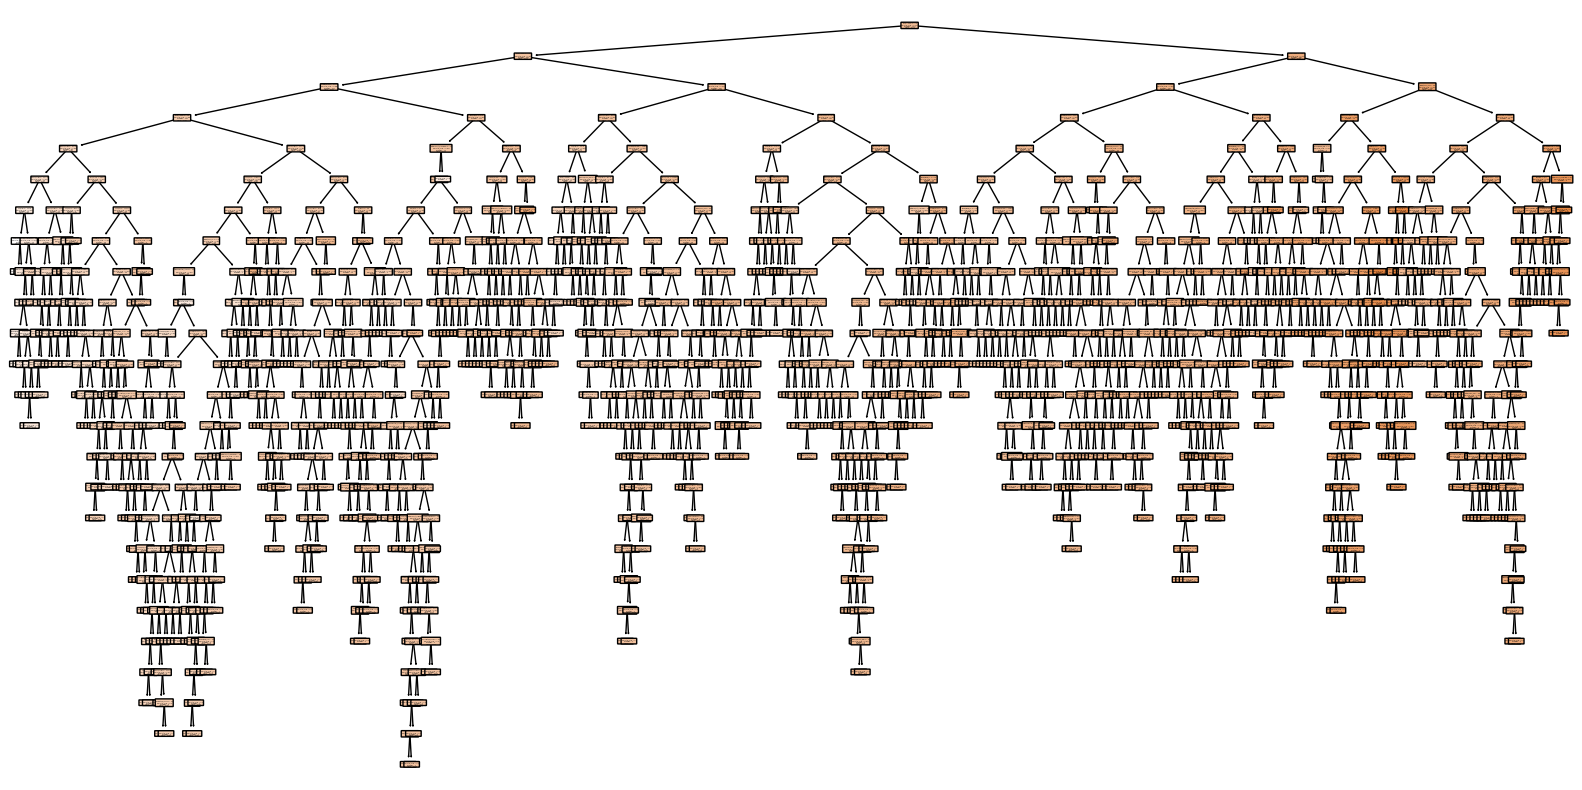

In [301]:
plt.figure(figsize=(20, 10))
plot_tree(
    DTC,
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

In [302]:
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7016586392563389)

##### Over fit


In [303]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models_ = []

for alpha in alphas:
    DTC = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models_.append(DTC)

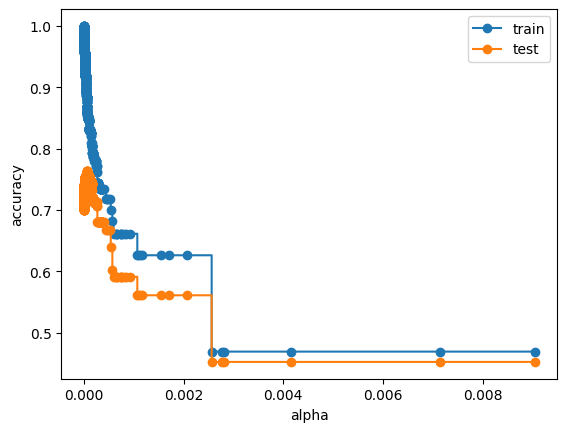

In [306]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models_]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models_]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

#### Score of test data set less than 80% which is bad result, so i will skip it


# Random forest


In [307]:
RF = RandomForestRegressor(n_estimators=50, random_state=45)
RF.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=45)

In [308]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9811038075151254, 0.8632115795989538)

In [309]:
param_grid = {
    "max_depth": [25, 30, 31, 35],
    "min_samples_split": [2, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt"],
    "ccp_alpha": [0.00001, 0.00002, 0.000001, 0.000003],
}

RF = RandomForestRegressor(n_estimators=50, random_state=45)


optimized_ridge = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.909 total time=   0.1s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.851 total time=   0.1s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.862 total time=   0.1s
[CV 4/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.834 total time=   0.1s
[CV 5/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.858 total time=   0.1s
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.912 total time=   0.1s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.848 tota

In [310]:
RF = RandomForestRegressor(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=30,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=5,
)
RF.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=1e-05, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=50, random_state=45)

In [311]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9573988021751343, 0.8562166352414387)

In [312]:
train_prediction = RF.predict(x_train)
test_prediction = RF.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9573988021751343
test score =  0.8562166352414387


In [313]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04254497146295175
MSE =  0.004265326954785835
RMSE =  0.20626432426125402
acc_score =  0.8562166352414387


In [320]:
data = {
    "model": "Random Foreest",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039493,0.003132,0.198728,0.924998,0.894405
1,lin reg scaled,0.040122,0.003262,0.200306,0.919444,0.890033
2,Ridge,0.039890,0.003245,0.199725,0.921619,0.890596
3,Elastic,0.040044,0.003290,0.200109,0.918875,0.889084
4,Random Foreest,0.042545,0.004265,0.206264,0.957399,0.856217


In [325]:
vot = VotingRegressor(
    estimators=[
        ("LinearRegression", LinearRegression()),
        (
            "LinearRegression scaled ",
            Pipeline(
                [
                    ("Scaling", StandardScaler()),
                    ("LinearRegression", LinearRegression(positive=True)),
                ]
            ),
        ),
        ("Ridge", Ridge(alpha=5)),
        ("ElasticNet", ElasticNet(max_iter=5000, alpha=0.0005, l1_ratio=0.5)),
        (
            "RandomForestRegressor",
            RandomForestRegressor(
                n_estimators=50,
                random_state=45,
                ccp_alpha=1e-05,
                max_depth=30,
                max_features="sqrt",
                min_samples_leaf=1,
                min_samples_split=5,
            ),
        ),
    ]
)
vot.fit(x_train, y_train)

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('LinearRegression scaled ',
                             Pipeline(steps=[('Scaling', StandardScaler()),
                                             ('LinearRegression',
                                              LinearRegression(positive=True))])),
                            ('Ridge', Ridge(alpha=5)),
                            ('ElasticNet',
                             ElasticNet(alpha=0.0005, max_iter=5000)),
                            ('RandomForestRegressor',
                             RandomForestRegressor(ccp_alpha=1e-05,
                                                   max_depth=30,
                                                   max_features='sqrt',
                                                   min_samples_split=5,
                                                   n_estimators=50,
                                                   random_state=45))])

In [326]:
train_prediction = vot.predict(x_train)
test_prediction = vot.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9365784615362674
test score =  0.8955999639954116


In [327]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.03857795548357931
MSE =  0.003097022304344617
RMSE =  0.19641271721449025
acc_score =  0.8955999639954116


In [328]:
data = {
    "model": "Votting",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039493,0.003132,0.198728,0.924998,0.894405
1,lin reg scaled,0.040122,0.003262,0.200306,0.919444,0.890033
2,Ridge,0.039890,0.003245,0.199725,0.921619,0.890596
3,Elastic,0.040044,0.003290,0.200109,0.918875,0.889084
4,Random Foreest,0.042545,0.004265,0.206264,0.957399,0.856217
5,Votting,0.038578,0.003097,0.196413,0.936578,0.895600


In [345]:
def output_inverse(value):
    value_inverse = math.pow(10, value)
    return value_inverse


predictions = vot.predict(test)

for i in range(len(predictions)):
    predictions[i] = output_inverse(predictions[i])
predictions

array([121321.33429609, 152625.18404793, 175600.43444626, ...,
       167805.82329514, 121839.75760737, 226462.17152307])

In [344]:
submmition = pd.DataFrame({"Id": ids, "SalePrice": predictions})
submmition.to_csv(
    "/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/Date_set/sample_submission.csv",
    index=False,
)